In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
plt.style.use("ggplot")

In [3]:
plt.rcParams['axes.prop_cycle']

'#E24A33'
'#348ABD'
'#988ED5'
'#777777'
'#FBC15E'
'#8EBA42'
'#FFB5B8'


In [17]:
dim = ['2', '4', '6', '8']

build_time_uniform = {}
build_time_uniform["rtree"]  = [3305, 4295, 5027, 5847]
build_time_uniform["rstar"]  = [131241, 191051, 297135, 423084]
build_time_uniform["kdtree"] = [28061, 39122, 49564, 61114]
build_time_uniform["ann"]    = [21541, 27170, 33366, 38247]
build_time_uniform["ug"   ]  = [638, 1068, 1804, 3320]
build_time_uniform["edg"  ]  = [4265, 7261, 10743, 15535]
build_time_uniform["flood"]  = [5441, 11474, 17879, 25895]
build_time_uniform["ifi"  ]  = [4978, 6503, 8233, 10305]
build_time_uniform["lisa" ]  = [8583, 11621, 15061, 18808]
build_time_uniform["mli"  ]  = [90782, 112859, 144662, 183381]
build_time_uniform["zm"   ]  = [1911, 2157, 2450, 2938]

range_uniform = {}
sel_uniform = 0.001 # 1 1 2 4
range_uniform["rtree"] = [138.8, 377.7, 1500.4, 4069]
range_uniform["rstar"] = [187.6, 573.1, 2067.2, 5871.8]
range_uniform["ug"   ] = [167.8, 723.3, 2054.6, 5041]
range_uniform["edg"  ] = [163.2, 583.5, 2044.9, 4684.2]
range_uniform['fs'   ] = [60814, 111020, 134106, 184891]
range_uniform["flood"] = [98.6, 466.7, 1415.8, 4071.3]
range_uniform["ifi"  ] = [113.8, 597, 2086.8, 9764.4]
range_uniform["lisa" ] = [120.2, 595.3, 1829.6, 4635.2]
range_uniform["mli"  ] = [878.8, 6543.7, 67596.6, 213056]
range_uniform["zm"   ] = [125.7, 412.6, 2373, 6473.1]

knn_uniform = {}
k_uniform = 1000
knn_uniform["rtree" ]  = [46.96, 108.02, 339.56, 1033.93]
knn_uniform["rstar" ]  = [50.39, 161.87, 531.71, 1465.49]
knn_uniform["kdtree"]  = [384.98, 843.37, 1624.07, 4297.28]
knn_uniform["ann"   ]  = [522.02, 1235.34, 2473.92, 6507.05]
knn_uniform['fs'    ]  = [36493.7, 59450.4, 85972, 122983]
knn_uniform["lisa"  ]  = [52.91, 503.54, 1133.72, 3401.71]
knn_uniform["mli"   ]  = [103.67, 1882.45, 8999.06, 43998.1]
knn_uniform["zm"    ]  = [505.02, 6913.47, 80226.6, 1140450.0]

build_time_gaussian = {}
build_time_gaussian["rtree"] = [3306, 4283, 4973, 5893]
build_time_gaussian["rstar"] = [122650, 205505, 353133, 546711]
build_time_gaussian["kdtree"]= [27148, 37097, 43269, 49991]
build_time_gaussian["ann"]   = [20150, 24938, 30133, 33459]
build_time_gaussian["ug"   ] = [501, 683, 1003, 1603]
build_time_gaussian["edg"  ] = [4193, 7290, 10739, 15413]
build_time_gaussian["flood"] = [5367, 11610, 18248, 25908]
build_time_gaussian["ifi"  ] = [4769, 6648, 8311, 10392]
build_time_gaussian["lisa" ] = [8409, 11612, 18230.8, 25894.7]
build_time_gaussian["mli"  ] = [88539, 109014, 146130, 184585]
build_time_gaussian["zm"   ] = [1663, 1716, 1943, 2175]

range_gaussian = {}
sel_gaussian = 0.001 # 1 2 3 4
range_gaussian["rtree"] = [1152, 1998.1, 2317.7, 6510.5]
range_gaussian["rstar"] = [1244.9, 4366.6, 6268.9, 20325.8]
range_gaussian["ug"   ] = [853.3, 4972.6, 42927.3, 52684]
range_gaussian["edg"  ] = [982.2, 1520.9, 3510.7, 6247.5]
range_gaussian['fs'   ] = [67198.3, 97072.5, 132587, 137145]
range_gaussian["flood"] = [468.4, 1097.1, 2693.2, 4566.7]
range_gaussian["ifi"  ] = [715.9, 1452.3, 4850, 11648.2]
range_gaussian["lisa" ] = [622.5, 1375.6, 2987.4, 4823.7]
range_gaussian["mli"  ] = [6525, 33343.6, 244740, 582922]
range_gaussian["zm"   ] = [799.8, 1526.2, 4873.9, 13267.3]

knn_gaussian = {}
knn_gaussian["rtree" ] = [48.75, 144.42, 593.76, 1677.9]
knn_gaussian["rstar" ] = [61.87, 669.6, 3972.97, 16736.8]
knn_gaussian["kdtree"] = [384.04, 828.5, 1895.35, 5383.01]
knn_gaussian["ann"   ] = [529.91, 1212.77, 2957.55, 8729.64]
knn_gaussian['fs'    ] = [35450.1, 57133.6, 82524.9, 112906]
knn_gaussian["lisa"  ] = [57.54, 425.78, 1329.4, 2944.8]
knn_gaussian["mli"   ] = [161.5, 9352.64, 56879.5, 127544]
knn_gaussian["zm"    ] = [369.98, 9175.38, 597312, 3495660]

In [16]:
11612*2.23

25894.76

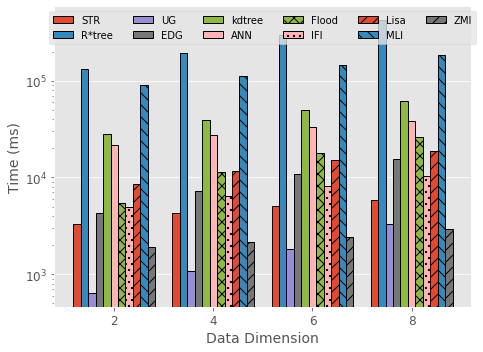

In [18]:
x = np.arange(len(dim))
w=0.075
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x-5*w   , build_time_uniform["rtree"], width=w, label="STR", edgecolor='k', linewidth=1)
ax.bar(x-4*w   , build_time_uniform["rstar"], width=w, label="R*tree", edgecolor='k', linewidth=1)
ax.bar(x-3*w   , build_time_uniform["ug"], width=w, label="UG", edgecolor='k', linewidth=1)
ax.bar(x-2*w   , build_time_uniform["edg"], width=w, label="EDG", edgecolor='k', linewidth=1)
ax.bar(x-w     , build_time_uniform["kdtree"], color='#8EBA42', width=w, label="kdtree", edgecolor='k', linewidth=1)
ax.bar(x       , build_time_uniform["ann"], color='#FFB5B8', width=w, label="ANN", edgecolor='k', linewidth=1)
ax.bar(x+w     , build_time_uniform["flood"], color="#8EBA42", width=w, label="Flood", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*2   , build_time_uniform["ifi"], color="#FFB5B8", width=w, label="IFI", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*3   , build_time_uniform["lisa"], color="#E24A33", width=w, label="Lisa", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*4   , build_time_uniform["mli"], color="#348ABD", width=w, label="MLI", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*5   , build_time_uniform["zm"], color="#777777", width=w, label="ZMI", edgecolor='k', linewidth=1, hatch="//")

ax.set_yscale('log')
ax.set_ylabel('Time (ms)', fontsize=14)
ax.set_xlabel('Data Dimension', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("uniform_construction_dim.pdf")

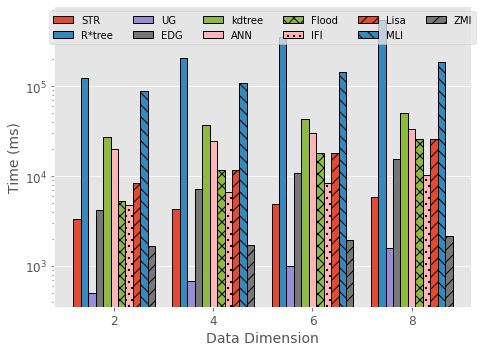

In [20]:
x = np.arange(len(dim))
w=0.075
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x-5*w   , build_time_gaussian["rtree"], width=w, label="STR", edgecolor='k', linewidth=1)
ax.bar(x-4*w   , build_time_gaussian["rstar"], width=w, label="R*tree", edgecolor='k', linewidth=1)
ax.bar(x-3*w   , build_time_gaussian["ug"], width=w, label="UG", edgecolor='k', linewidth=1)
ax.bar(x-2*w   , build_time_gaussian["edg"], width=w, label="EDG", edgecolor='k', linewidth=1)
ax.bar(x-w     , build_time_gaussian["kdtree"], color='#8EBA42', width=w, label="kdtree", edgecolor='k', linewidth=1)
ax.bar(x       , build_time_gaussian["ann"], color='#FFB5B8', width=w, label="ANN", edgecolor='k', linewidth=1)
ax.bar(x+w     , build_time_gaussian["flood"], color="#8EBA42", width=w, label="Flood", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*2   , build_time_gaussian["ifi"], color="#FFB5B8", width=w, label="IFI", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*3   , build_time_gaussian["lisa"], color="#E24A33", width=w, label="Lisa", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*4   , build_time_gaussian["mli"], color="#348ABD", width=w, label="MLI", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*5   , build_time_gaussian["zm"], color="#777777", width=w, label="ZMI", edgecolor='k', linewidth=1, hatch="//")
# ax.plot([2.225], [1], color='r', marker='x', markersize=8)
# ax.plot([3.225], [1], color='r', marker='x', markersize=8)

ax.set_yscale('log')
ax.set_ylabel('Time (ms)', fontsize=14)
ax.set_xlabel('Data Dimension', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("gaussian_construction_dim.pdf")

In [7]:
x+w*3

array([0.225, 1.225, 2.225, 3.225])

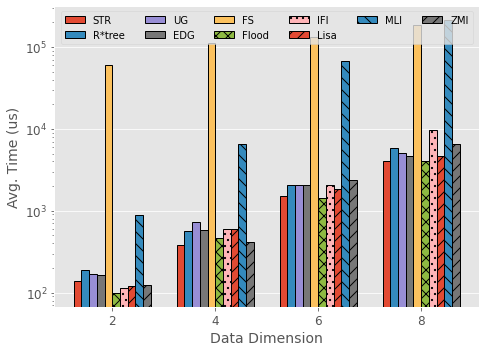

In [21]:
x = np.arange(len(dim))
w=0.075
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x-4.5*w   , range_uniform["rtree"], width=w, label="STR", edgecolor='k', linewidth=1)
ax.bar(x-3.5*w   , range_uniform["rstar"], width=w, label="R*tree", edgecolor='k', linewidth=1)
ax.bar(x-2.5*w   , range_uniform["ug"], width=w, label="UG", edgecolor='k', linewidth=1)
ax.bar(x-1.5*w   , range_uniform["edg"], width=w, label="EDG", edgecolor='k', linewidth=1)
ax.bar(x-0.5*w   , range_uniform["fs"], color='#FBC15E', width=w, label="FS", edgecolor='k', linewidth=1)
ax.bar(x+0.5*w   , range_uniform["flood"], color="#8EBA42", width=w, label="Flood", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*1.5   , range_uniform["ifi"], color="#FFB5B8", width=w, label="IFI", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*2.5   , range_uniform["lisa"], color="#E24A33", width=w, label="Lisa", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*3.5   , range_uniform["mli"], color="#348ABD", width=w, label="MLI", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*4.5   , range_uniform["zm"], color="#777777", width=w, label="ZMI", edgecolor='k', linewidth=1, hatch="//")

ax.set_yscale('log')
ax.set_ylabel('Avg. Time (us)', fontsize=14)
ax.set_xlabel('Data Dimension', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("uniform_range_dim.pdf")

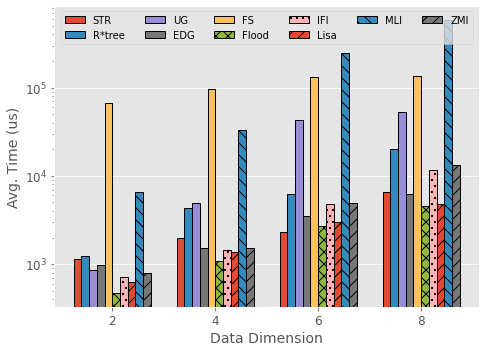

In [23]:
x = np.arange(len(dim))
w=0.075
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x-4.5*w   , range_gaussian["rtree"], width=w, label="STR", edgecolor='k', linewidth=1)
ax.bar(x-3.5*w   , range_gaussian["rstar"], width=w, label="R*tree", edgecolor='k', linewidth=1)
ax.bar(x-2.5*w   , range_gaussian["ug"], width=w, label="UG", edgecolor='k', linewidth=1)
ax.bar(x-1.5*w   , range_gaussian["edg"], width=w, label="EDG", edgecolor='k', linewidth=1)
ax.bar(x-0.5*w   , range_gaussian["fs"], color='#FBC15E', width=w, label="FS", edgecolor='k', linewidth=1)
ax.bar(x+0.5*w   , range_gaussian["flood"], color="#8EBA42", width=w, label="Flood", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*1.5   , range_gaussian["ifi"], color="#FFB5B8", width=w, label="IFI", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*2.5   , range_gaussian["lisa"], color="#E24A33", width=w, label="Lisa", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*3.5   , range_gaussian["mli"], color="#348ABD", width=w, label="MLI", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*4.5   , range_gaussian["zm"], color="#777777", width=w, label="ZMI", edgecolor='k', linewidth=1, hatch="//")
# ax.plot([2.1875], [1], color='r', marker='x', markersize=8)
# ax.plot([3.1875], [1], color='r', marker='x', markersize=8)

ax.set_yscale('log')
ax.set_ylabel('Avg. Time (us)', fontsize=14)
ax.set_xlabel('Data Dimension', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("gaussian_range_dim.pdf")

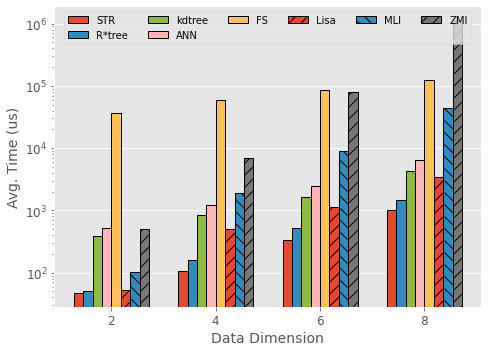

In [24]:
x = np.arange(len(dim))
w=0.09
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x-3.5*w   , knn_uniform["rtree"], width=w, label="STR", edgecolor='k', linewidth=1)
ax.bar(x-2.5*w   , knn_uniform["rstar"], width=w, label="R*tree", edgecolor='k', linewidth=1)
ax.bar(x-1.5*w   ,   knn_uniform["kdtree"], color='#8EBA42', width=w, label="kdtree", edgecolor='k', linewidth=1)
ax.bar(x-0.5*w   ,   knn_uniform["ann"], color='#FFB5B8', width=w, label="ANN", edgecolor='k', linewidth=1)
ax.bar(x+0.5*w   , knn_uniform["fs"], color='#FBC15E', width=w, label="FS", edgecolor='k', linewidth=1)
ax.bar(x+w*1.5   , knn_uniform["lisa"], color="#E24A33", width=w, label="Lisa", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*2.5   , knn_uniform["mli"], color="#348ABD", width=w, label="MLI", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*3.5   , knn_uniform["zm"], color="#777777", width=w, label="ZMI", edgecolor='k', linewidth=1, hatch="//")


ax.set_yscale('log')
ax.set_ylabel('Avg. Time (us)', fontsize=14)
ax.set_xlabel('Data Dimension', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("uniform_knn_dim.pdf")

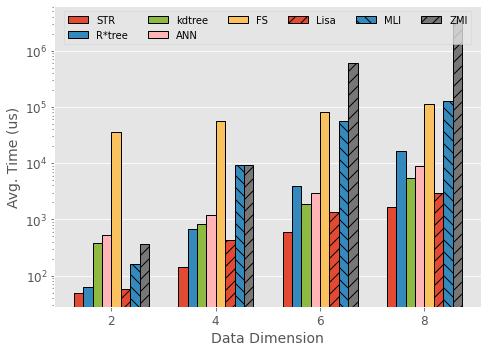

In [26]:
x = np.arange(len(dim))
w=0.09
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x-3.5*w   , knn_gaussian["rtree"], width=w, label="STR", edgecolor='k', linewidth=1)
ax.bar(x-2.5*w   , knn_gaussian["rstar"], width=w, label="R*tree", edgecolor='k', linewidth=1)
ax.bar(x-1.5*w   , knn_gaussian["kdtree"], color='#8EBA42', width=w, label="kdtree", edgecolor='k', linewidth=1)
ax.bar(x-0.5*w   , knn_gaussian["ann"], color='#FFB5B8', width=w, label="ANN", edgecolor='k', linewidth=1)
ax.bar(x+0.5*w   , knn_gaussian["fs"], color='#FBC15E', width=w, label="FS", edgecolor='k', linewidth=1)
ax.bar(x+w*1.5   , knn_gaussian["lisa"], color="#E24A33", width=w, label="Lisa", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*2.5   , knn_gaussian["mli"], color="#348ABD", width=w, label="MLI", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*3.5   , knn_gaussian["zm"], color="#777777", width=w, label="ZMI", edgecolor='k', linewidth=1, hatch="//")
# ax.plot([2.135], [1], color='r', marker='x', markersize=8)
# ax.plot([3.135], [1], color='r', marker='x', markersize=8)

ax.set_yscale('log')
ax.set_ylabel('Avg. Time (us)', fontsize=14)
ax.set_xlabel('Data Dimension', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("gaussian_knn_dim.pdf")